In [36]:
import numpy as np
import pandas as pd
import random
import os
import tensorflow as tf
# from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from joblib import dump, load
from sklearn.preprocessing import StandardScaler
import shap
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('mystyle.mplstyle')

# print the JS visualization code to the notebook
shap.initjs()

In [2]:
# path_pfxs = [
#     "../data/importantWavelength/teff",
#     "../data/importantWavelength/logg",
#     "../data/importantWavelength/feh",
#     "../data/importantWavelength/bp_rp_0",
#     "../data/importantWavelength/mg_geo"
# ]
# 
# for path_pfx in path_pfxs:
#     data0 = pd.read_csv(path_pfx+"0.csv")
#     data1 = pd.read_csv(path_pfx+"1.csv")
#     data = pd.concat([data0,data1],axis=0)
#     data.to_csv(path_pfx+".csv", index=False)

In [5]:
param = pd.read_csv("../data/dataset/LGA/LAMOST_Gaia_APOGEE_param.csv", usecols=['teff','logg','feh','mg_geo','bp_rp_0'])
_, y_test = train_test_split(param, test_size = 0.2, random_state = 42, shuffle = True)
y_test = y_test[0:2000].reset_index(drop=True)

In [6]:
y_test[y_test['teff']<=5000]

,teff,logg,feh,mg_geo,bp_rp_0
15,4857.3660,4.594220,-0.492070,6.353115,1.078204
20,4994.6260,4.544015,-0.074277,6.021982,1.065449
32,4970.2730,4.585809,-0.241810,6.304921,1.118064
48,4923.4220,4.536280,0.056599,5.946143,1.126911
61,4928.9336,4.567033,-0.077861,5.540768,1.110158
...,...,...,...,...,...
1949,4898.1540,4.493741,0.077672,5.791454,1.122429
1954,4984.0825,4.572691,0.029623,5.984182,1.128297
1966,4937.4770,4.505670,0.314810,5.695910,1.077035
1977,4932.0005,4.518900,-0.311290,5.845848,0.973562


In [4]:
# data = pd.read_csv("../data/importantWavelength/teff.csv")
# y = np.mean(np.abs(data))
# y = (y-min(y)) / (max(y)-min(y))
# y_index = list(np.arange(3925,8800))
# y.index = y_index
# y.to_csv('/data/home/scy0568/run/data/importantWavelength/y_teff.csv')

TypeError: 'numpy.float64' object is not iterable

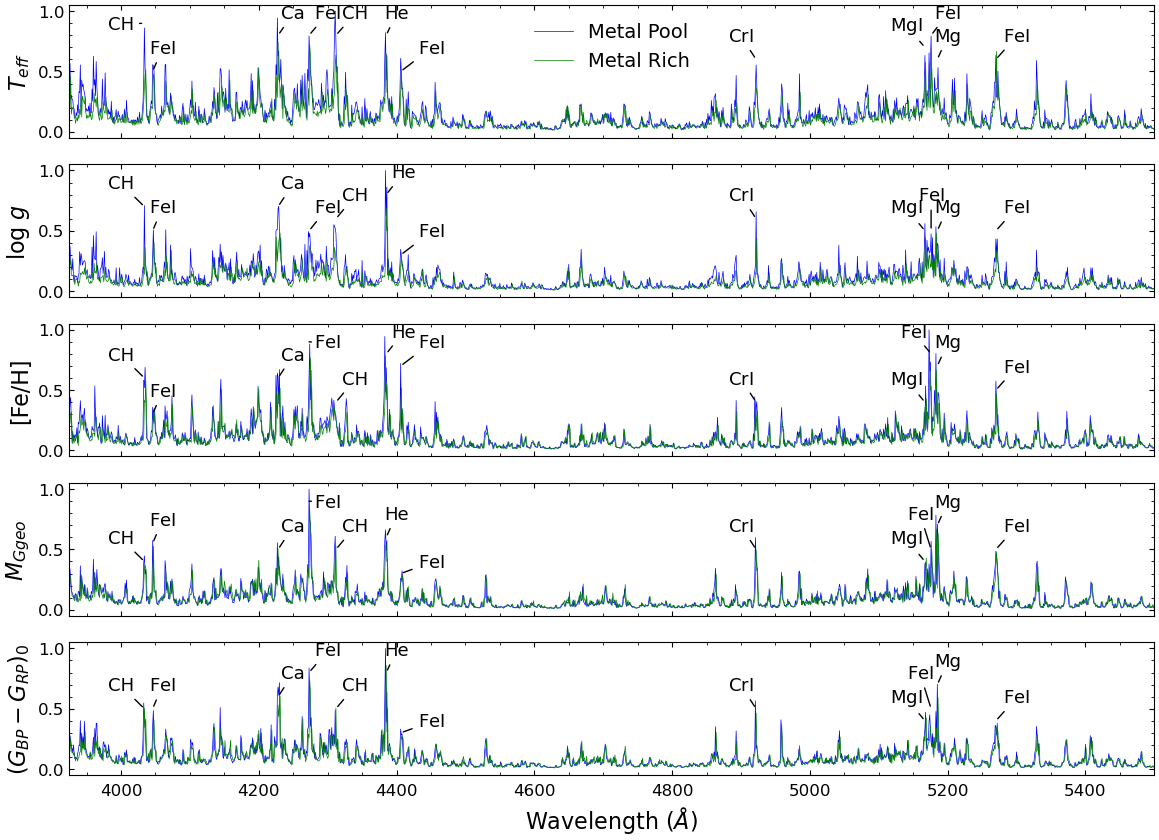

In [37]:
# y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))
x = np.arange(3925, 8800, 1)
params = ["teff","logg","feh","bp_rp_0","mg_geo"]
label=['$T_{eff}$', 'log $g$', '[Fe/H]', '$M_{Ggeo}$', '$(G_{BP}-G_{RP})_{0}$', '$d_{geo}$']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14,10), sharex=True)

# ?? Liu的线表为Ca4227,Moore为FeI 位置：4227、4228
Ca = [[4228,0.8, 4250,0.94],
      [4228,0.7, 4250,0.85],
      [4228,0.6, 4250,0.75],
      [4228,0.5, 4250,0.65],
      [4228,0.6, 4250,0.75]]
FeI0 = [[4273,0.8, 4300, 0.94],
       [4273,0.5, 4300, 0.65],
       [4273,0.9, 4300, 0.85],
       [4273,0.9, 4300, 0.85],
       [4273,0.8, 4300, 0.94]]
# ??  FeI !! Liu的线表为He4388,Moore为FeII 位置：4385，4386
He = [[4385,0.8, 4400, 0.94],
      [4385,0.8, 4410, 0.94],
      [4385,0.8, 4410, 0.94],
      [4385,0.6, 4400, 0.75],
      [4385,0.8, 4400, 0.94]]
FeI4 = [[4406,0.5, 4450,0.65],
        [4406,0.3, 4450,0.45],
        [4406,0.7, 4450,0.85],
        [4406,0.3, 4450,0.35],
        [4406,0.3, 4450,0.35]]
# Moore CH/TiII
CH0 = [[4312,0.8, 4340,0.94],
      [4312,0.6, 4340,0.75],
      [4312,0.4, 4340,0.55],
      [4312,0.5, 4340,0.65],
      [4312,0.5, 4340,0.65]]
CH1 = [[4034,0.9, 4000,0.85],
       [4034,0.7, 4000,0.85],
       [4034,0.6, 4000,0.75],
       [4034,0.4, 4000,0.55],
       [4034,0.5, 4000,0.65]]
FeI3 = [[4046,0.5, 4060,0.65],
        [4046,0.5, 4060,0.65],
        [4046,0.3, 4060,0.45],
        [4046,0.55, 4060,0.7],
        [4046,0.5, 4060,0.65]]
FeI1 = [[5176,0.8, 5200,0.94],
        [5176,0.5, 5176,0.75],
        [5176,0.8, 5150,0.94],
        [5176,0.5, 5160,0.75],
        [5176,0.5, 5160,0.75]]
FeI2 = [[5270,0.6, 5300,0.75],
        [5270,0.5, 5300,0.65],
        [5270,0.5, 5300,0.65],
        [5270,0.5, 5300,0.65],
        [5270,0.4, 5300,0.55]]
MgI = [[5167,0.7, 5140,0.84],
       [5167,0.5, 5140,0.65],
       [5167,0.4, 5140,0.55],
       [5167,0.4, 5140,0.55],
       [5167,0.4, 5140,0.55]]
CrI = [[4922,0.6, 4900,0.75],
       [4922,0.6, 4900,0.75],
       [4922,0.4, 4900,0.55],
       [4922,0.5, 4900,0.65],
       [4922,0.5, 4900,0.65]]
# ?? Liu的线表为Mg,Moore为TiII/MgH 位置：5184、5185
Mg = [[5185,0.6, 5200,0.75],
      [5185,0.5, 5200,0.65],
      [5185,0.7, 5200,0.85],
      [5185,0.7, 5200,0.85],
      [5185,0.7, 5200,0.85]]

for i,param in enumerate(params):
    data = pd.read_csv(f"../data/importantWavelength/{param}.csv")
    y1 = np.mean(np.abs(data[y_test['feh']<0]), axis=0)
    y2 = np.mean(np.abs(data[y_test['feh']>=0]), axis=0)
    ymin, ymax = min(np.min(y1),np.min(y2)), max(np.max(y1),np.max(y2))
    # y1_norm = (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))
    # y2_norm = (y2 - np.min(y2)) / (np.max(y2) - np.min(y2))
    y1_norm = (y1-ymin) / (ymax-ymin)
    y2_norm = (y2-ymin) / (ymax-ymin)
    axes[i].plot(x, y1_norm, color='blue', linewidth=0.5, label='Metal Pool')
    axes[i].plot(x+1, y2_norm, color='green', linewidth=0.5, label='Metal Rich')
    axes[i].set_xlim(3925,5500)
    axes[i].set_ylabel(label[i])
    if i == 0:
        axes[i].legend()
    
    axes[i].annotate(text = 'He', xy=(He[i][0],He[i][1]), xytext=(He[i][2],He[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Ca', xy=(Ca[i][0],Ca[i][1]), xytext=(Ca[i][2],Ca[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Mg', xy=(Mg[i][0],Mg[i][1]), xytext=(Mg[i][2],Mg[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'CH', xy=(CH0[i][0],CH0[i][1]), xytext=(CH0[i][2],CH0[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'CH', xy=(CH1[i][0],CH1[i][1]), xytext=(CH1[i][2],CH1[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI0[i][0],FeI0[i][1]), xytext=(FeI0[i][2],FeI0[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI1[i][0],FeI1[i][1]), xytext=(FeI1[i][2],FeI1[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI2[i][0],FeI2[i][1]), xytext=(FeI2[i][2],FeI2[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Mg$\mathrm{I}$', xy=(MgI[i][0],MgI[i][1]), xytext=(MgI[i][2],MgI[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI3[i][0],FeI3[i][1]), xytext=(FeI3[i][2],FeI3[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI4[i][0],FeI4[i][1]), xytext=(FeI4[i][2],FeI4[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Cr$\mathrm{I}$', xy=(CrI[i][0],CrI[i][1]), xytext=(CrI[i][2],CrI[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
axes[4].set_xlabel("Wavelength ($\AA$)")
plt.savefig('../figure/shap_metal.pdf')

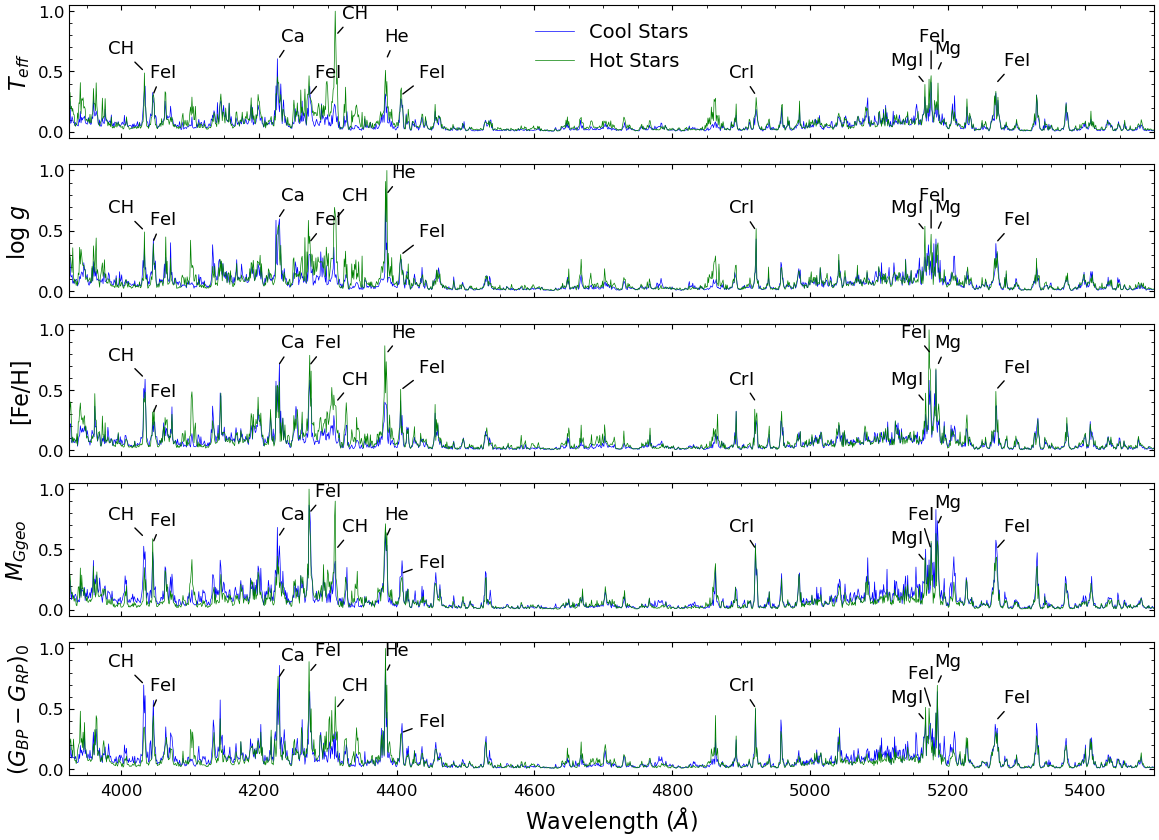

In [43]:
# y_normalized = (y - np.min(y)) / (np.max(y) - np.min(y))
x = list(np.arange(3925, 8800, 1))
params = ["teff","logg","feh","bp_rp_0","mg_geo"]
label=['$T_{eff}$', 'log $g$', '[Fe/H]', '$M_{Ggeo}$', '$(G_{BP}-G_{RP})_{0}$', '$d_{geo}$']
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 10), sharex=True)

# ?? Liu的线表为Ca4227,Moore为FeI 位置：4227、4228
Ca = [[4228,0.6, 4250,0.75],
      [4228,0.6, 4250,0.75],
      [4228,0.7, 4250,0.85],
      [4228,0.6, 4250,0.75],
      [4228,0.75, 4250,0.9]]
FeI0 = [[4273,0.3, 4300, 0.45],
        [4273,0.4, 4300, 0.55],
        [4273,0.7, 4300, 0.85],
        [4273,0.8, 4300, 0.94],
        [4273,0.8, 4300, 0.94]]
# ??  FeI !! Liu的线表为He4388,Moore为FeII 位置：4385，4386
He = [[4385,0.6, 4400, 0.75],
      [4385,0.8, 4410, 0.94],
      [4385,0.8, 4410, 0.94],
      [4385,0.6, 4400, 0.75],
      [4385,0.8, 4400, 0.94]]
FeI4 = [[4406,0.3, 4450,0.45],
        [4406,0.3, 4450,0.45],
        [4406,0.5, 4450,0.65],
        [4406,0.3, 4450,0.35],
        [4406,0.3, 4450,0.35]]
# Moore CH/TiII
CH0 = [[4312,0.8, 4340,0.94],
      [4312,0.6, 4340,0.75],
      [4312,0.4, 4340,0.55],
      [4312,0.5, 4340,0.65],
      [4312,0.5, 4340,0.65]]
CH1 = [[4034,0.5, 4000,0.65],
       [4034,0.5, 4000,0.65],
       [4034,0.6, 4000,0.75],
       [4034,0.6, 4000,0.75],
       [4034,0.7, 4000,0.85]]
FeI3 = [[4046,0.3, 4060,0.45],
        [4046,0.4, 4060,0.55],
        [4046,0.3, 4060,0.45],
        [4046,0.55, 4060,0.7],
        [4046,0.5, 4060,0.65]]
FeI1 = [[5176,0.5, 5176,0.75],
        [5176,0.5, 5176,0.75],
        [5176,0.8, 5150,0.94],
        [5176,0.5, 5160,0.75],
        [5176,0.5, 5160,0.75]]
FeI2 = [[5270,0.4, 5300,0.55],
        [5270,0.4, 5300,0.55],
        [5270,0.5, 5300,0.65],
        [5270,0.5, 5300,0.65],
        [5270,0.4, 5300,0.55]]
MgI = [[5167,0.4, 5140,0.55],
       [5167,0.5, 5140,0.65],
       [5167,0.4, 5140,0.55],
       [5167,0.4, 5140,0.55],
       [5167,0.4, 5140,0.55]]
CrI = [[4922,0.3, 4900,0.45],
       [4922,0.5, 4900,0.65],
       [4922,0.4, 4900,0.55],
       [4922,0.5, 4900,0.65],
       [4922,0.5, 4900,0.65]]
# ?? Liu的线表为Mg,Moore为TiII/MgH 位置：5184、5185
Mg = [[5185,0.5, 5200,0.65],
      [5185,0.5, 5200,0.65],
      [5185,0.7, 5200,0.85],
      [5185,0.7, 5200,0.85],
      [5185,0.7, 5200,0.85]]

for i,param in enumerate(params):
    data = pd.read_csv(f"../data/importantWavelength/{param}.csv")
    y1 = np.mean(np.abs(data[y_test['teff']<=5000]), axis=0)
    y2 = np.mean(np.abs(data[y_test['teff']>6000]), axis=0)
    ymin, ymax = min(np.min(y1),np.min(y2)), max(np.max(y1),np.max(y2))
    # y1_norm = (y1 - np.min(y1)) / (np.max(y1) - np.min(y1))
    # y2_norm = (y2 - np.min(y2)) / (np.max(y2) - np.min(y2))
    y1_norm = (y1-ymin) / (ymax-ymin)
    y2_norm = (y2-ymin) / (ymax-ymin)
    axes[i].plot(x, y1_norm, color='blue', linewidth=0.5, label='Cool Stars')
    axes[i].plot(x, y2_norm, color='green', linewidth=0.5, label='Hot Stars')
    axes[i].set_xlim(3925,5500)
    axes[i].set_ylabel(label[i])
    if i == 0:
        axes[i].legend(loc='upper center')
    
    axes[i].annotate(text = 'He', xy=(He[i][0],He[i][1]), xytext=(He[i][2],He[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Ca', xy=(Ca[i][0],Ca[i][1]), xytext=(Ca[i][2],Ca[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Mg', xy=(Mg[i][0],Mg[i][1]), xytext=(Mg[i][2],Mg[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'CH', xy=(CH0[i][0],CH0[i][1]), xytext=(CH0[i][2],CH0[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'CH', xy=(CH1[i][0],CH1[i][1]), xytext=(CH1[i][2],CH1[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI0[i][0],FeI0[i][1]), xytext=(FeI0[i][2],FeI0[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI1[i][0],FeI1[i][1]), xytext=(FeI1[i][2],FeI1[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI2[i][0],FeI2[i][1]), xytext=(FeI2[i][2],FeI2[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Mg$\mathrm{I}$', xy=(MgI[i][0],MgI[i][1]), xytext=(MgI[i][2],MgI[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI3[i][0],FeI3[i][1]), xytext=(FeI3[i][2],FeI3[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Fe$\mathrm{I}$', xy=(FeI4[i][0],FeI4[i][1]), xytext=(FeI4[i][2],FeI4[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))
    axes[i].annotate(text = 'Cr$\mathrm{I}$', xy=(CrI[i][0],CrI[i][1]), xytext=(CrI[i][2],CrI[i][3]), ha='center',
        arrowprops=dict(facecolor='black', edgecolor='black', arrowstyle='-'))


axes[4].set_xlabel("Wavelength ($\AA$)")
plt.savefig('../figure/shap_teff.pdf')


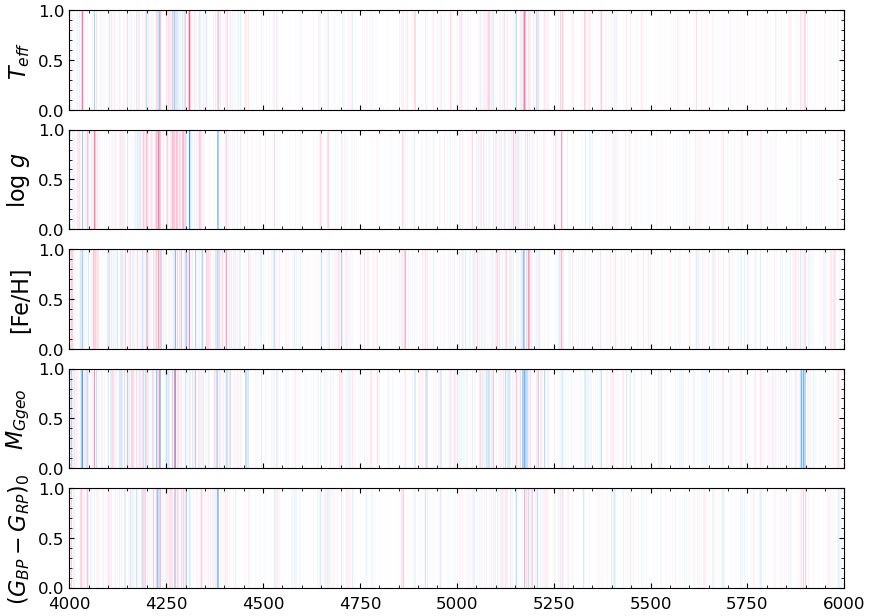

In [105]:
from matplotlib.gridspec import GridSpec
params = ["teff","logg","feh","bp_rp_0","mg_geo"]
label=['$T_{eff}$', 'log $g$', '[Fe/H]', '$M_{Ggeo}$', '$(G_{BP}-G_{RP})_{0}$', '$d_{geo}$']

colormap = shap.plots.colors.red_transparent_blue
fig = plt.figure(figsize=(10,7.5))
gs = GridSpec(5, 1, figure=fig)

for i,param in enumerate(params):
    tt = pd.read_csv(f"../data/importantWavelength/{param}.csv")
    sv = np.array(np.mean(tt, axis=0))
    # sv = np.array(tt.iloc[0,:])
    vmax = np.max(sv)
    ax = fig.add_subplot(gs[i,0])
    ax.imshow(sv.reshape(1,-1), aspect = 'auto', cmap=colormap, extent=[3925, 8800, 0, 1], vmin=-vmax, vmax=vmax) 
    if i != 4:
        ax.xaxis.set_ticklabels([])
    ax.set_xlim(4000,6000)
    ax.set_ylabel(label[i])

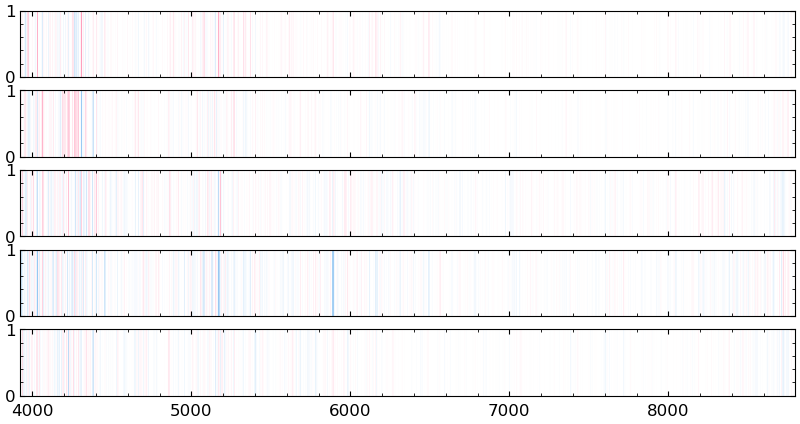

In [98]:
from matplotlib.gridspec import GridSpec
colormap = shap.plots.colors.red_transparent_blue
fig = plt.figure(figsize=(10,5))
gs = GridSpec(5, 1, figure=fig)

for i,param in enumerate(params):
    tt = pd.read_csv(f"../data/importantWavelength/{param}.csv")
    sv = np.array(np.mean(tt, axis=0))
    # sv = np.array(tt.iloc[0,:])
    vmax = np.max(sv)
    ax = fig.add_subplot(gs[i,0])
    ax.imshow(sv.reshape(1,-1), aspect = 'auto', cmap=colormap, extent=[3925, 8800, 0, 1], vmin=-vmax, vmax=vmax) 
    if i != 4:
        ax.xaxis.set_ticklabels([])